In [10]:
import json

file = '..//data/jsonpull/531.json'

# Get animalData from our JSON file
with open(file, encoding='utf-8-sig') as jsonFile:
    data = json.load(jsonFile)
    animalData = (data["animals"])
    
    print(len(animalData))

100


In [11]:
from textblob import TextBlob

# TextBlob Sentiment Analyzer 

# Polarity
# Range [-1.0, 1.0] where -1.0 is negative polarity and 1.0 is positive polarity
# polarity (def): emotional states such as enjoyment, anger, disgust, sadness, fear and surprise

# Subjectivity
# Range [0.0, 1.0] where 0.0 is objective and 1.0 is subjective
# objective (def): not influenced by personal feelings. logical
# subjective (def): influenced by personal feelings. emotional

# Test TextBlob
text = "I am so happy today!"
analysis = TextBlob(text).sentiment

print(analysis)


Sentiment(polarity=1.0, subjectivity=1.0)


In [12]:
import csv
import pandas as pd

csvFile = "SentimentAnalysisOnBreeds2.csv"

with open(csvFile, 'w', newline='') as file:
    # create a new CSV file
    writerObj = csv.writer(file)
    # add the following rows to CSV file
    writerObj.writerow(['ID','Breed','Description','Polarity','Subjectivity'])
    
breedsCSV = pd.read_csv(csvFile)
breedsCSV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            0 non-null      object
 1   Breed         0 non-null      object
 2   Description   0 non-null      object
 3   Polarity      0 non-null      object
 4   Subjectivity  0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [13]:
# Performs Sentiment Analysis on item 2 of List
# Returns a list back with scores of sentiment saved item 3(polarity) and 4(subjectivity)
def sentAnalysis(List):  
    
    # grab the description from the 3rd list item
    desc = List[2]
    
    # As long as it's not empty, perform sentiment analysis
    if desc is not None:
        
        # if the length of the string is 7, we know its a string of numbers
        # it could also be an empty string, so we will say anything less than length 8
        # we don't want to do sentiment analysis here
        if (len(desc) < 8):
           return List
               
            
        # do sentiment analysis on the description
        blob = TextBlob(desc)
        polarity = blob.polarity
        subjectivity = blob.subjectivity
        
        # assign sentiment analysis results to list values 
        List[3] = polarity
        List[4] = subjectivity
        
        return List

    # if the type is of type none, we return the list
    return List
    

In [14]:
from csv import writer

# This loop takes the parameters we want out of animalData (id,breed,description) and puts them into a new list for each pet
# Append the newly created list to our csv file created above for further data manipulation

for pet in animalData:
    # attributes we will add to our csv file
    List = [(pet['id']), (pet['breeds']['primary']),(pet['description']), None, None ]
    
    sentAnalysis(List)

    # Open existing CSV file in append mode
    # Create a file object for the file
    with open(csvFile, 'a') as file:
        
        # pass file object to csv.writer()
        # get a writer object
        writerObj = writer(file)
        
        # pass the list as an argument to writerow()
        writerObj.writerow(List)
        
        # close file
        file.close()
    

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(csvFile)
df = pd.DataFrame(data)

# remove all rows with at least one field of missing data
newDF = df.dropna()

# Polarity
pol = newDF['Polarity']
lenPol = len(pol)
sumPol = sum(pol)
avgPol = sumPol / lenPol

print("Average Polarity: ", avgPol)

# Subjectivity
sub = newDF['Subjectivity']
lenSub = len(sub)
sumSub = sum(sub)
avgSub = sumSub / lenSub

print("Average Subjectivity: ", avgSub)

Average Polarity:  0.22646316212722462
Average Subjectivity:  0.4241936477873975


In [22]:
# Create a pivot table to show mean polarity and subjectivity by breed
# Average polarity and subjectivity at the bottom
pivotTable = pd.pivot_table(newDF, index='Breed', values=['Polarity','Subjectivity'], aggfunc=['mean'], margins=True, margins_name='Average')
pivotTable

mean             
                                     Polarity Subjectivity
Breed                                                     
American Staffordshire Terrier       0.435000     0.681667
Australian Cattle Dog / Blue Heeler  0.225648     0.458981
Australian Kelpie                    0.150000     0.400000
Beagle                              -0.045833     0.220833
Bernese Mountain Dog                 0.143750     0.518750
Black Labrador Retriever             1.000000     1.000000
Border Collie                        0.437500     0.533333
Boxer                                0.625000     0.950000
Catahoula Leopard Dog                0.500000     0.725000
Cattle Dog                           0.098437     0.300000
Chihuahua                           -0.020000     0.411667
Chow Chow                            0.600000     0.950000
English Pointer                      0.120952     0.388869
English Shepherd                     0.250000     0.300000
German Shepherd Dog                  0.204978     0.437910
German Wirehaired Pointer            0.625000     0.600000
Great Dane                           0.014286     0.145238
Great Pyrenees                       0.088333     0.374167
Husky                                0.038310     0.235619
Labrador Retriever                   0.276203     0.414411
Leonberger                           0.107143     0.264286
Mastiff                              0.300000     0.712500
Mixed Breed                          0.075000     0.204167
Pit Bull Terrier                     0.241250     0.367500
Poodle                               0.200000     0.350000
Rottweiler                          -0.034821     0.211607
Schnauzer                           -0.015000     0.600000
Shepherd                             0.362500     0.473750
Siberian Husky                       0.198958     0.558333
Terrier                              0.500000     0.500000
Average                              0.226463     0.424194

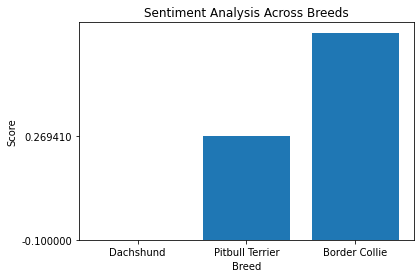

In [23]:
# Compare Daachshunds, Pitbulls, and Bordie Collies in a Bar Chart
data = ['-0.100000','0.269410','0.458788']
labels = ['Dachshund','Pitbull Terrier','Border Collie']

plt.xticks(range(len(data)), labels)
plt.yticks([-1,0,1])
plt.xlabel('Breed')
plt.ylabel('Score')
plt.title('Sentiment Analysis Across Breeds')
plt.bar(range(len(data)), data) 
plt.show()

<AxesSubplot:xlabel='Breed'>

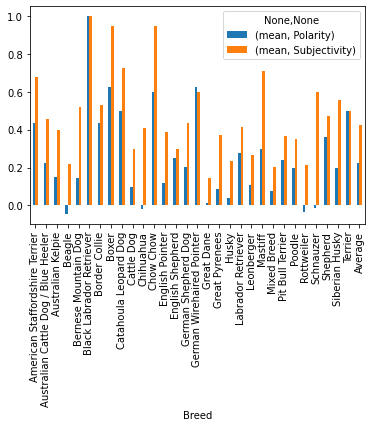

In [24]:
# Show Bar Chart of all Breeds and their scores
pivotTable.plot(kind='bar')

In [ ]:
`